In [1]:
## Poisson Equation
# Load  FEM Packages
from fenics import *
from mshr import *
import numpy as np
# Plotting Libraries
import matplotlib.pyplot as plt
plt.style.use("_classic_test_patch")
import time # Timing

In [2]:
start = time.time()
# Define geometric parameters
inner_radius = 0.5
outer_radius = 2.0

# Classes for boundaries 
class InnerBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary
    
class OuterBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return sqrt(x[0]**2 + x[1]**2)  < outer_radius - DOLFIN_EPS and on_boundary

# Function Definition
def PlotFields(u_field, e_field):
    """
    PlotFields(u_field, e_field)
    """
    fig = plt.figure(figsize = (14,10))                       # Set the resolution
    plt.subplot(121)
    figU = plot(u_field)
    plt.colorbar(figU, shrink=0.5)
    plt.title("Potential Field")
    plt.subplot(122)
    figE = plot(e_field)
    plt.colorbar(figE, shrink = 0.5)
    plt.title("Electric Field")
    plt.show()

def AnalyticV(x, a, b):
    """
    Analytical Solution:
    u(x) = - (10  / np.log(b/a)) * np.log(x/a) + 10
    """
    return - (10  / np.log(b/a)) * np.log(x/a) + 10
def AnalyticE(x, a, b):
    """
    Electric Field
    E(x) = - 10 / x
    """
    return ((10  / np.log(b/a)) * (1 / x))

def PlotComparissonVField(x, y, inner_radius, outer_radius):
    plt.figure(dpi=400)                       
    plt.plot(x, y)
    plt.plot(x, AnalyticV(x, inner_radius, outer_radius), '--')
    # plt.title("Comparisson Between Aproximate and Analytic Solution for Potential")
    plt.xlabel("Radius")
    plt.ylabel("Potential Field")
    plt.legend(["FEM", "Analytic"])
    plt.grid()
    plt.show()                  
    
def PlotComparissonEField(x, y, inner_radius, outer_radius):
    plt.figure(dpi=400)                       
    plt.plot(x, y)
    plt.plot(x, AnalyticE(x, inner_radius, outer_radius), '--')
    # plt.title("Comparisson Between Aproximate and Analytic Solution for Electric Field")
    plt.xlabel("Radius")
    plt.ylabel("Electric Field")
    plt.legend(["FEM", "Analytic"])
    plt.grid()
    plt.show()                  

In [3]:
# Create mesh
domain = Circle(Point(0, 0), outer_radius) - Circle(Point(0, 0), inner_radius)
mesh = generate_mesh(domain, 25)

# Create mesh functions over the cell facets
sub_domains = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)

# Mark all facets as sub domains
sub_domains.set_all(2)
inner = InnerBoundary()
outer = OuterBoundary()
inner.mark(sub_domains, 0)
outer.mark(sub_domains, 1)

# Define function space
V = FunctionSpace(mesh, 'P', 1)
bc0 = DirichletBC(V, Constant(0.0), sub_domains, 0)
bc1 = DirichletBC(V, Constant(10.0), sub_domains, 1)
bcs = [bc0, bc1]

In [4]:
# Solve Poisson equation
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(u), grad(v)) * dx
L = Constant('0') * v * dx
u = Function(V)
solve(a == L, u, bcs)

Solving linear variational problem.


In [5]:
## Plotting the solution.
plt.figure(dpi=400)                       
# plot(mesh, title = 'Coaxial Mesh')              
# plt.colorbar(plot(u)) 
plt.show()

<Figure size 2560x1920 with 0 Axes>

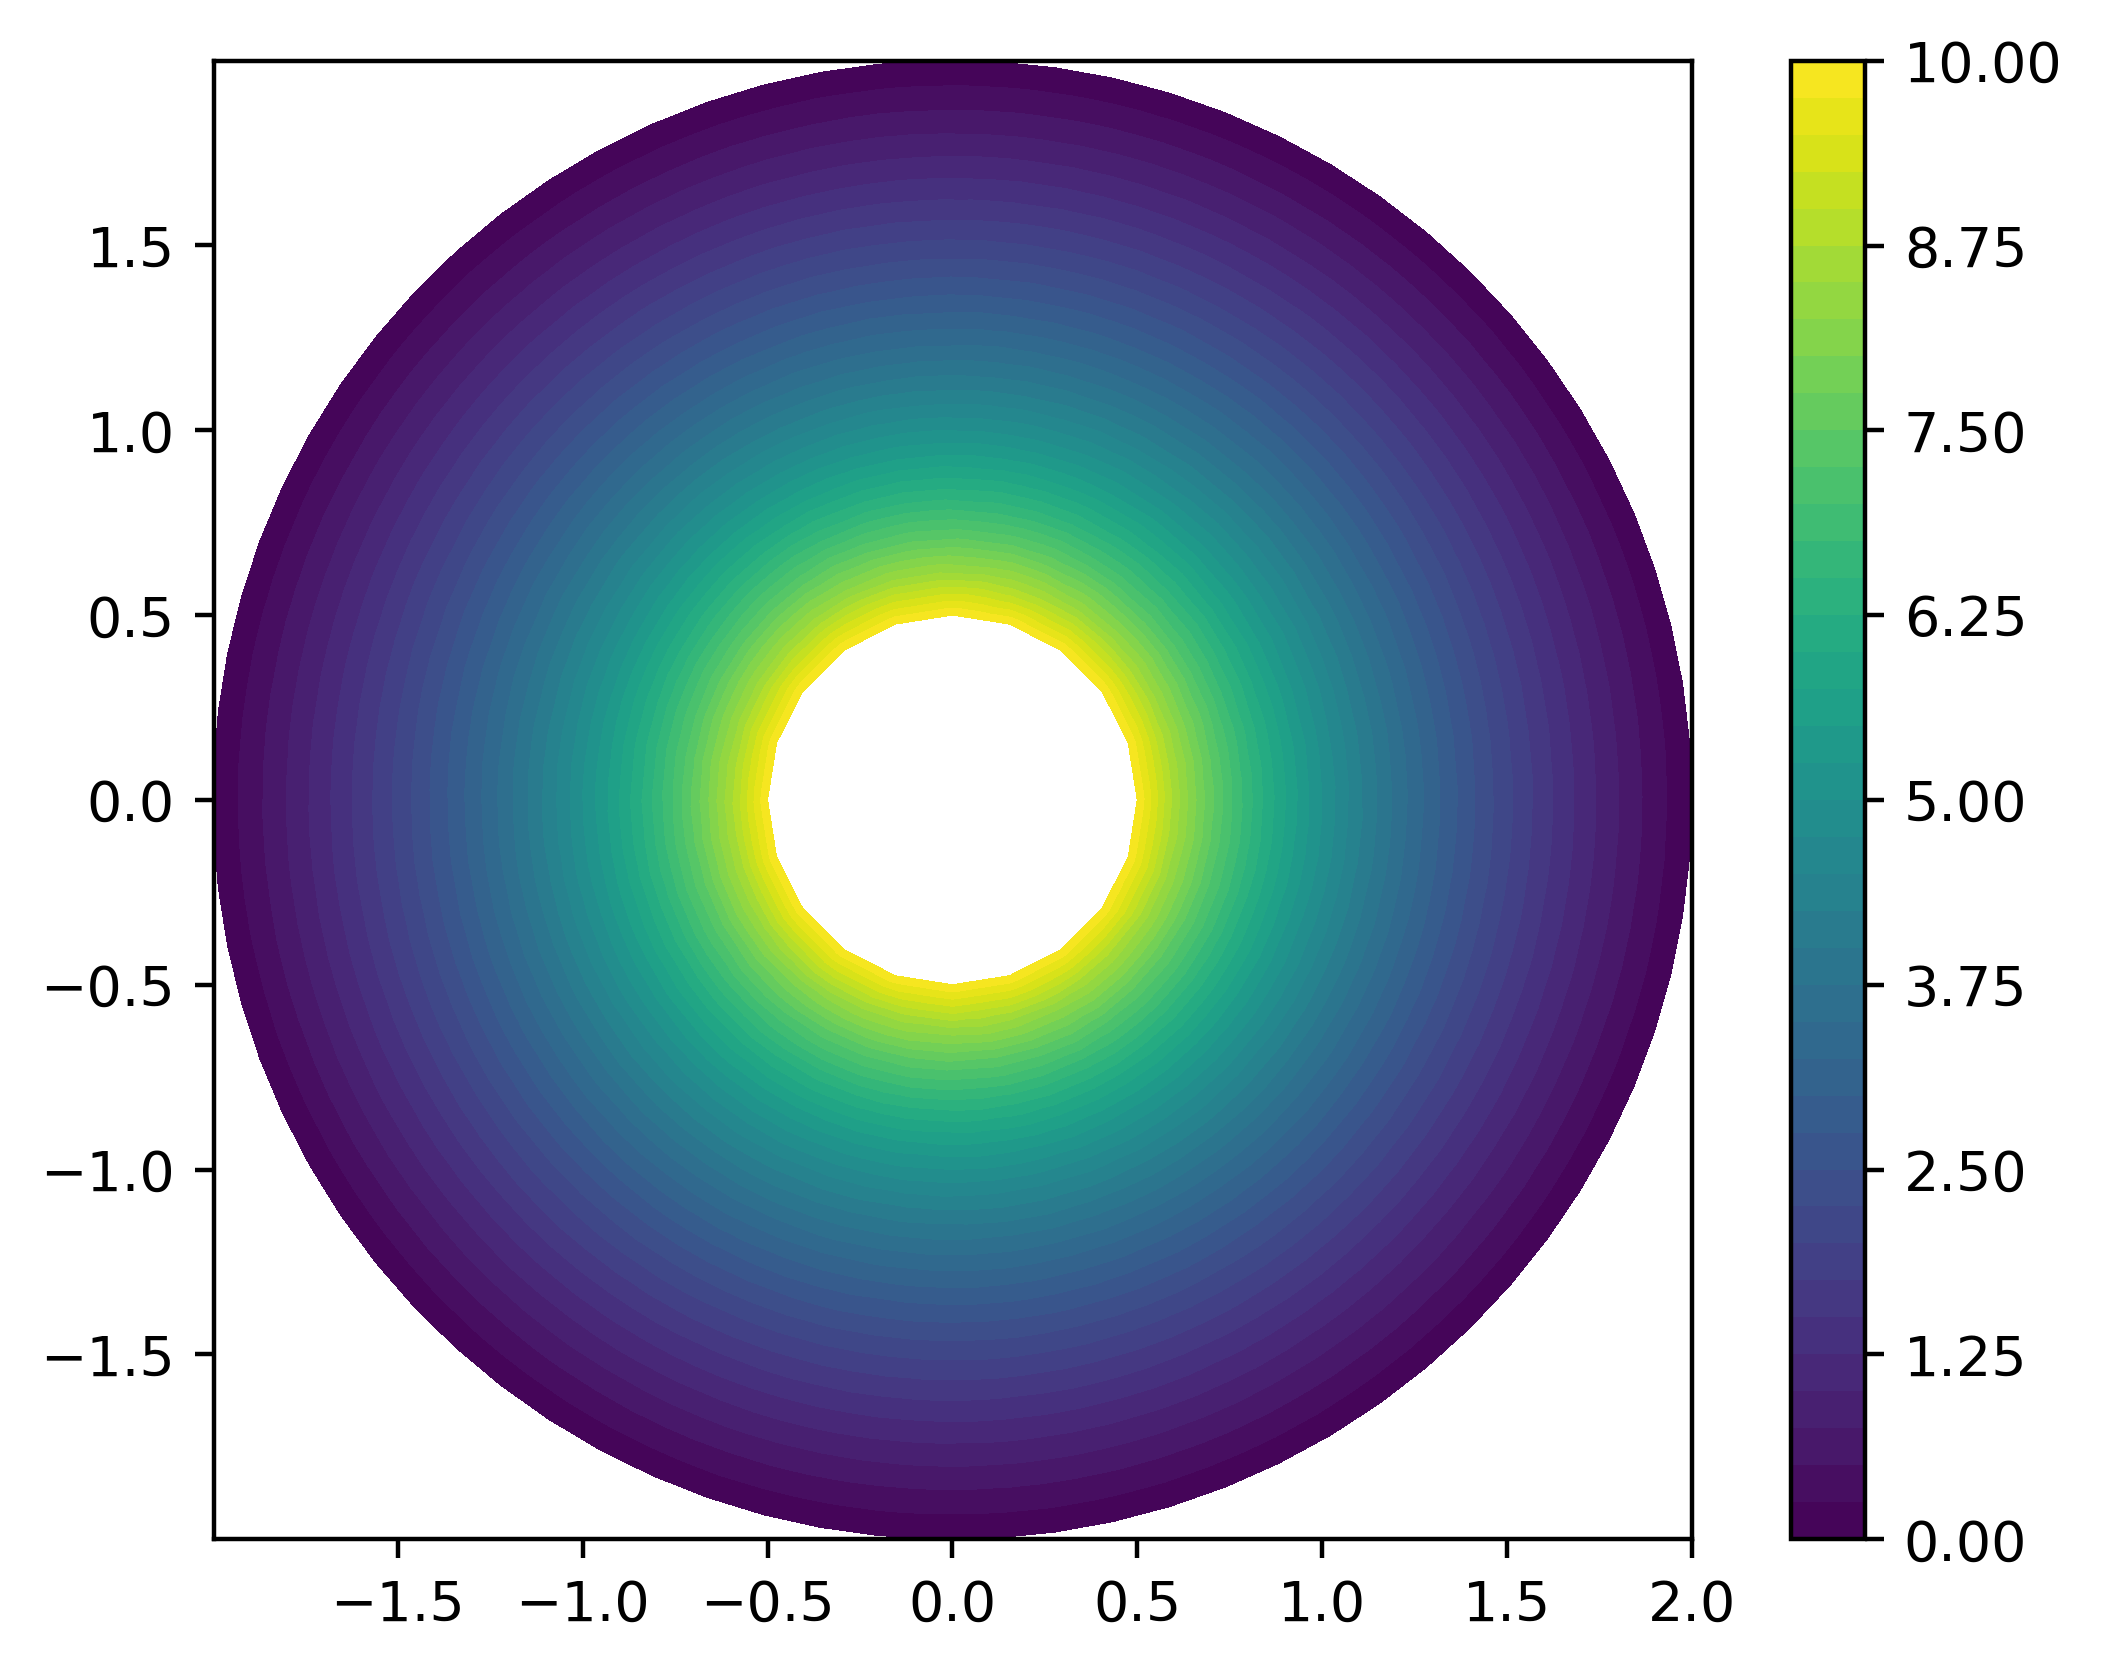

In [6]:
## Plotting the solution.
plt.figure(dpi=400)                       
# plot(u, title = 'Potential Field')              
plt.colorbar(plot(u)) 
plt.savefig("PotentialFieldFEMCoaxial.png")
plt.show()

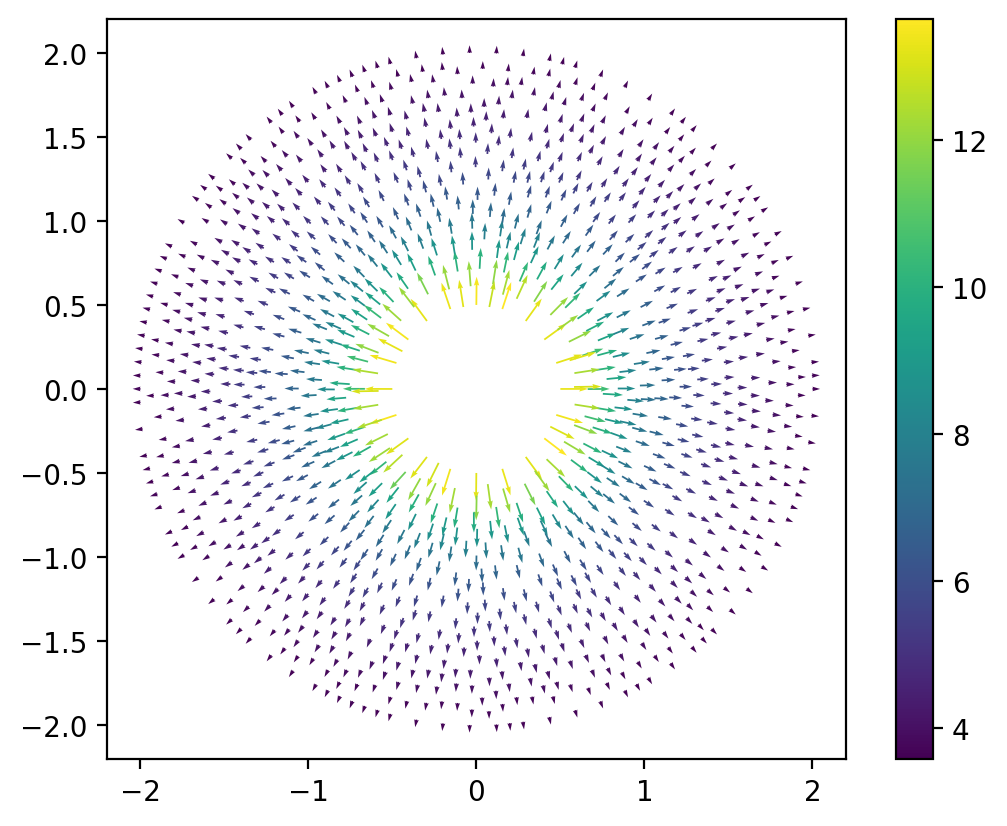

In [7]:
## Plotting the electric field.
e_field = - grad(u)
e = project(e_field)
plt.figure(dpi=200)                       
# plot(e, title = 'Electric Field')              
plt.colorbar(plot(e)) 
plt.savefig("ElectricFieldFEMCoaxial.png")
plt.show()                  

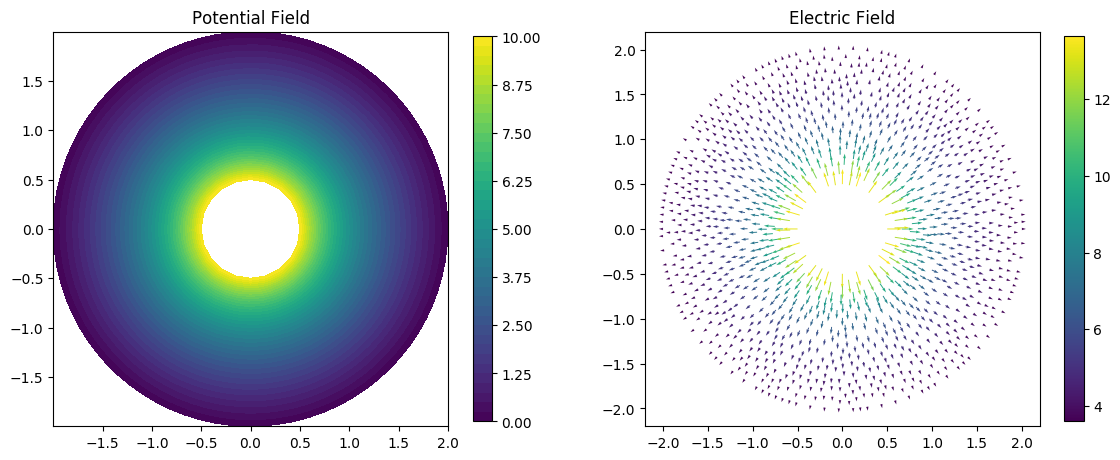

<Figure size 640x480 with 0 Axes>

In [8]:
PlotFields(u, e)
plt.savefig("FEMCoaxial.png")

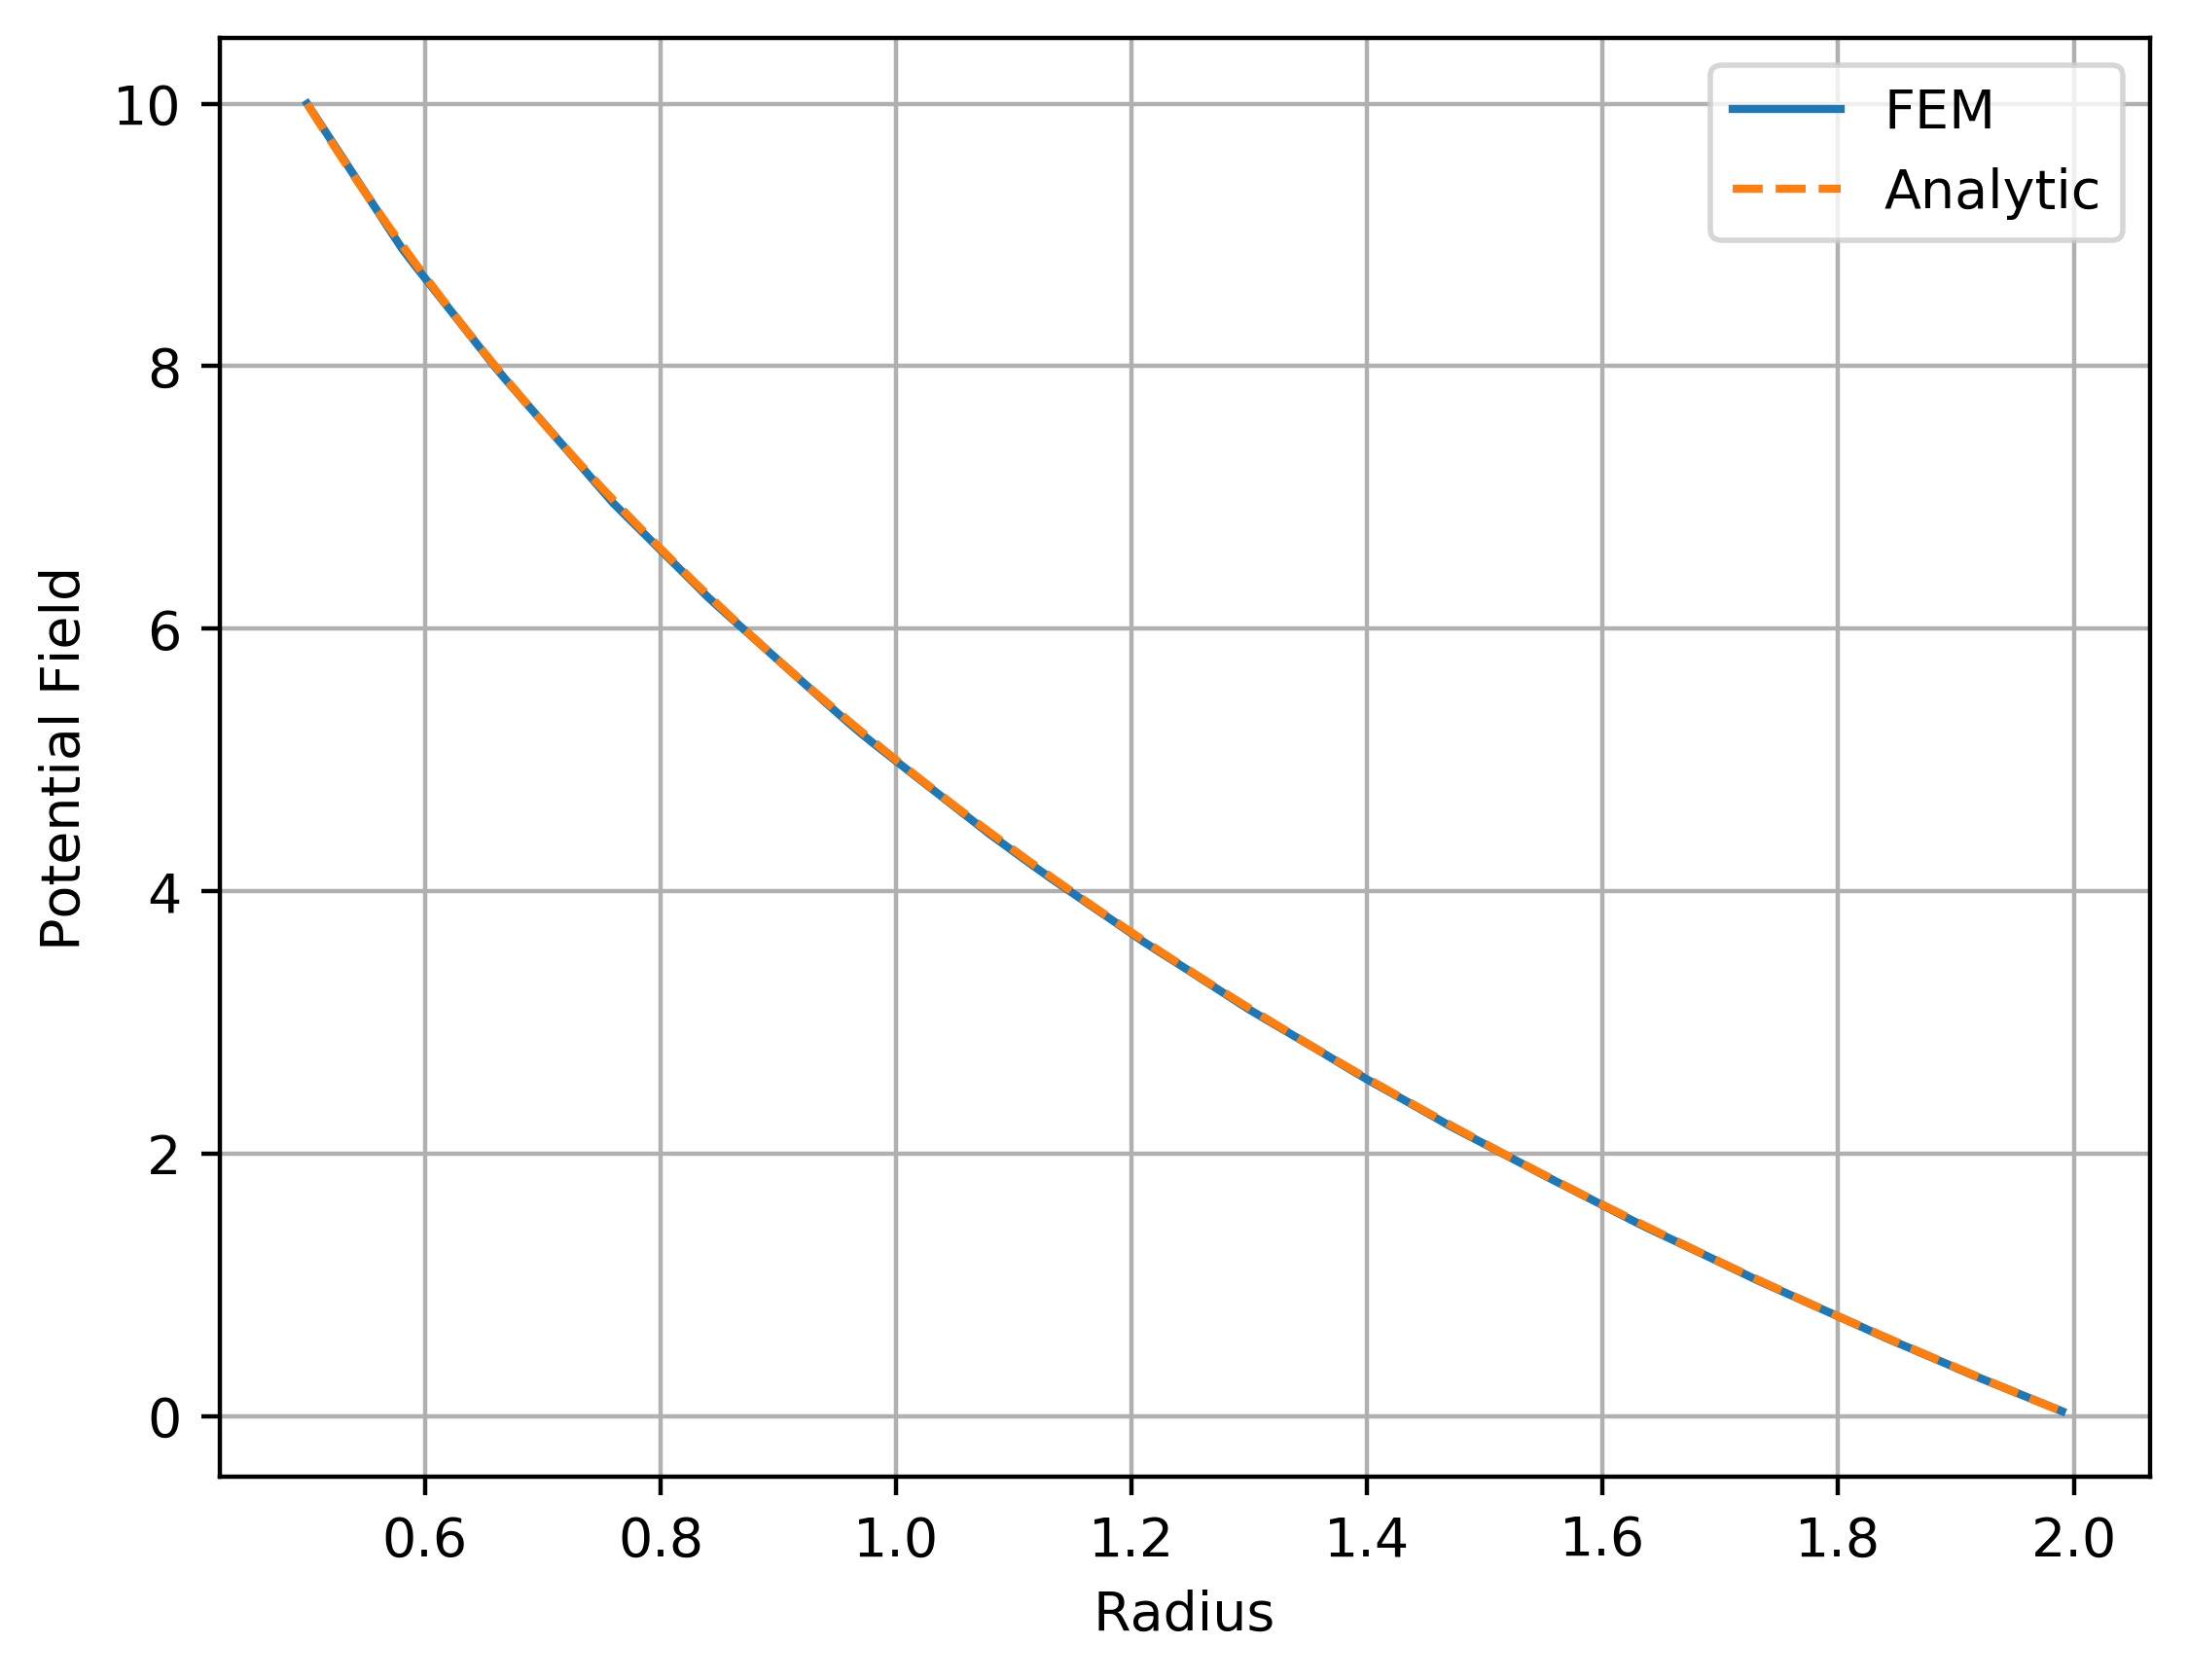

<Figure size 640x480 with 0 Axes>

In [9]:
# Comparisson with the Potential Field
x = np.arange(inner_radius, outer_radius, 0.01)
y = [u(Point(i, 0)) for i in x]
PlotComparissonVField(x, y, inner_radius, outer_radius)
plt.savefig("ComparissonPotentialFEMCoaxial.png")


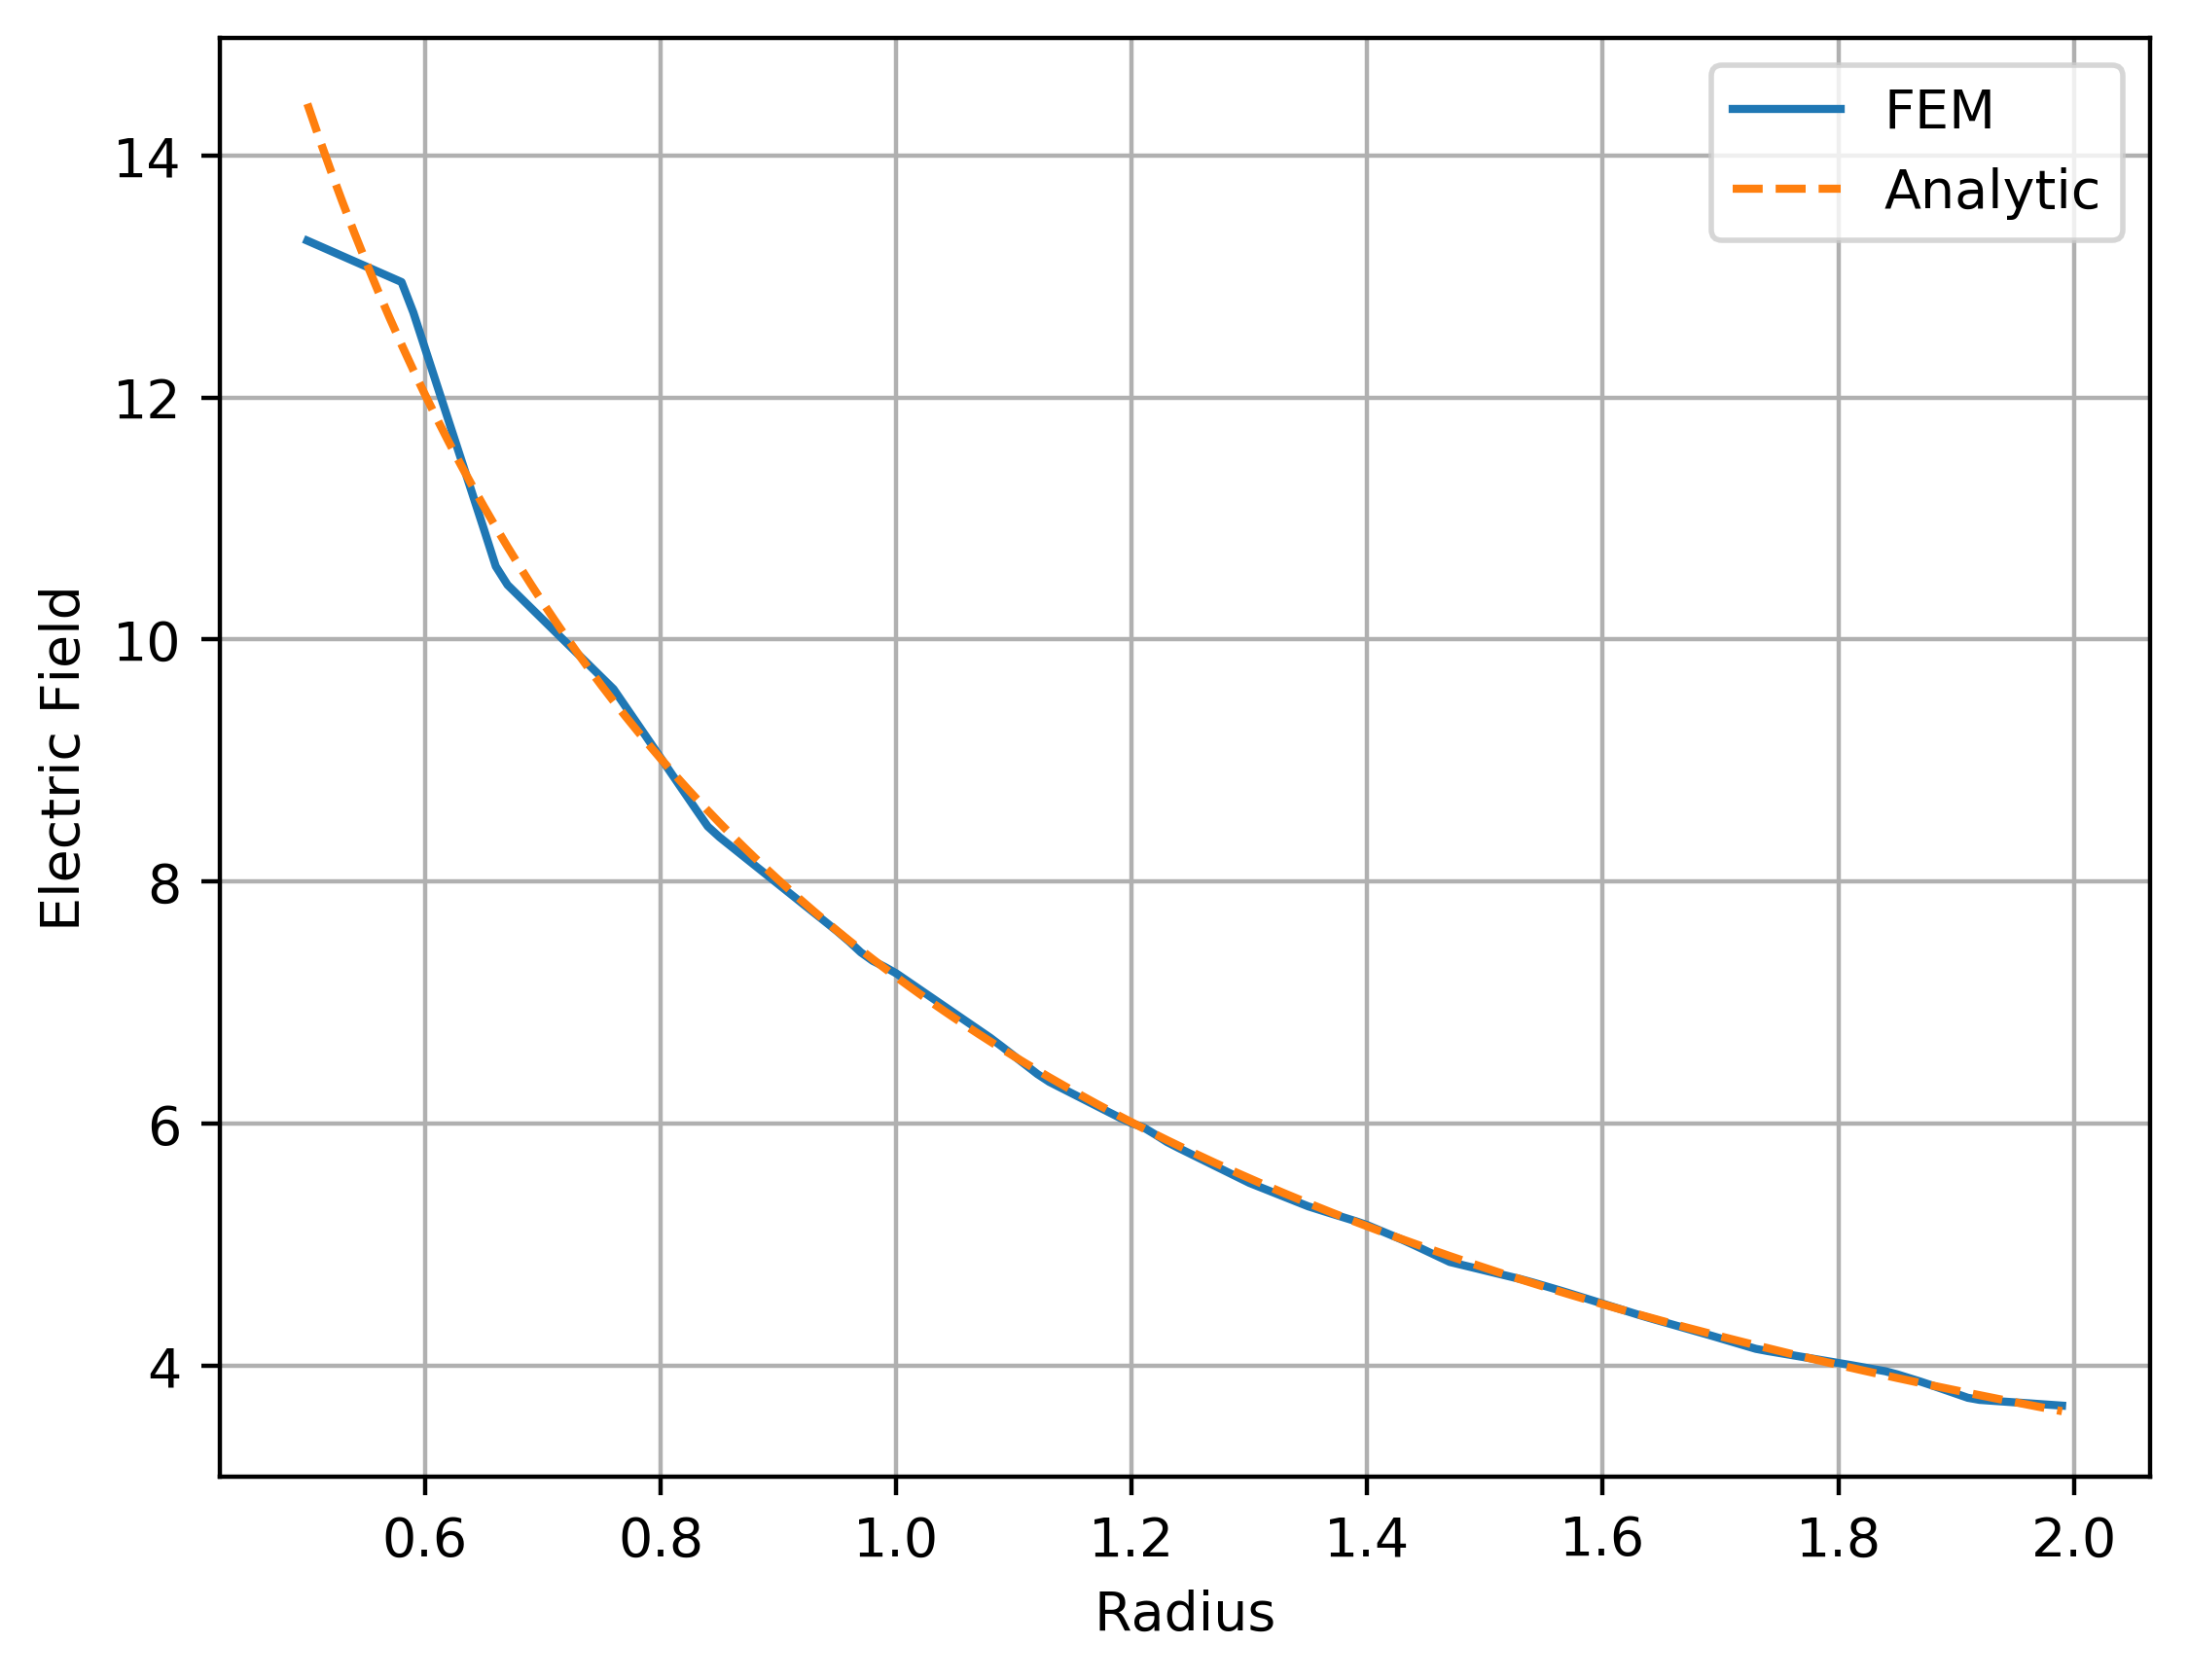

<Figure size 640x480 with 0 Axes>

In [10]:
# Comparisson with the Electric Field
# x1 = np.arange(inner_radius, outer_radius, 0.01)
y1 = [e(Point(i, 0))[0] for i in x]
PlotComparissonEField(x, y1, inner_radius, outer_radius)
plt.savefig("ComparissonElectricFEMCoaxial.png")

# end = time.time()


In [11]:
final  = time.time()
print("Total Time: ", final - start)

Total Time:  2.0880792140960693


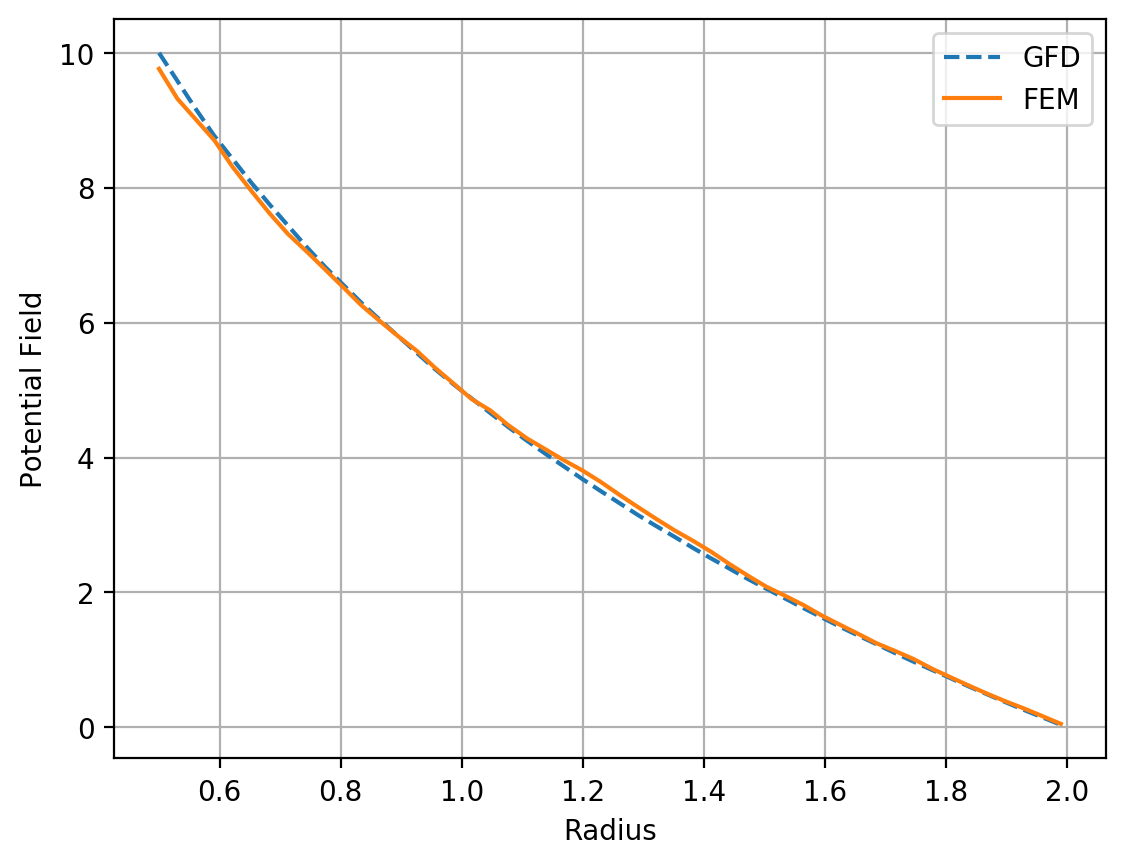

In [12]:
# Comparisson Between The GFD and FEM
y_GFD = np.linspace(inner_radius, 1.99, 50)
x_GFD = [9.762555428523092, 9.318857554051077, 9.012229627298815, 8.705879313276258, 8.307268995965298, 7.958446817264932, 7.622444741738769, 7.3157142041462135, 7.060281301150473, 6.7948868321967195, 6.526696182033194, 6.255402977203453, 6.022882773531246, 5.797185107236807, 5.582935755678979, 5.3300994669419, 5.097092266675937, 4.863517443702829, 4.698388611418365, 4.474858247171111, 4.282023678752375, 4.1210925921725625, 3.959295096913816, 3.809157283281594, 3.6381868579256036, 3.449879466169591, 3.2692930281800363, 3.092650131207359, 2.921500855092335, 2.767342336555782, 2.6025164878272613, 2.4195517571383043, 2.2474037196437164, 2.0839814751516648, 1.9524652880366988, 1.8144556636142921, 1.6588597019916633, 1.5203687826653731, 1.3840209703792197, 1.2444017463585664, 1.130863060722847, 1.0120028681475708, 0.8683026914918783, 0.7428539342886932, 0.6184069311850675, 0.4975050647274445, 0.384132841501089, 0.2787469722797418, 0.16528781686087618, 0.05083508190628628]
y = [u(Point(i, 0)) for i in y_GFD]
plt.figure(dpi=200)
plt.plot(y_GFD, y, '--')
plt.plot(y_GFD, x_GFD)
plt.xlabel("Radius")
plt.ylabel("Potential Field")
plt.legend(["GFD", "FEM"])
plt.grid()
plt.savefig("ComparissonPotentialFEMGFD.png")
plt.show()